# Linear Regression Project

### Introduction 

##### Forecast the bike demand 
 
##### datetime - hourly date + timestamp
##### season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
##### holiday - whether the day is considered a holiday
##### workingday - whether the day is neither a weekend nor holiday
##### weather -
####### 1: Clear, Few clouds, Partly cloudy, Partly cloudy
####### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
####### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
####### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
##### temp - temperature in Celsius
##### atemp - "feels like" temperature in Celsius
##### humidity - relative humidity
##### windspeed - wind speed
##### casual - number of non-registered user rentals initiated
##### registered - number of registered user rentals initiated
##### count - number of total rentals

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# Get the Data

In [3]:
#Reading in bikeshare.csv file and set it to a dataframe called bike
bike = pd.read_csv('bikeshare.csv')

In [14]:
#Checking the head of bike
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
#Checking the summary of bike
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Exploratory Data Analysis

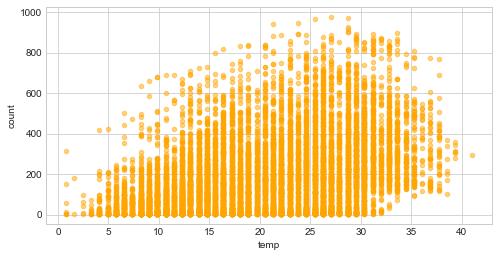

In [8]:
#Creating a scatter plot of count vs temp
bike.plot.scatter(x='temp',y='count',alpha=0.5,color='orange',figsize=(8,4))

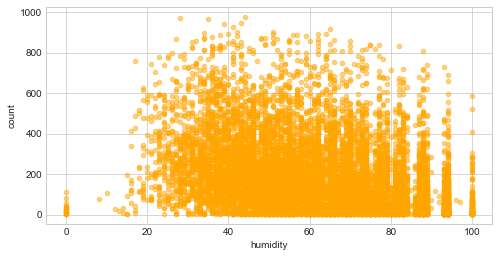

In [9]:
#Creating a scatter plot of count vs humidity
bike.plot.scatter(x='humidity',y='count',alpha=0.5,color='orange',figsize=(8,4))

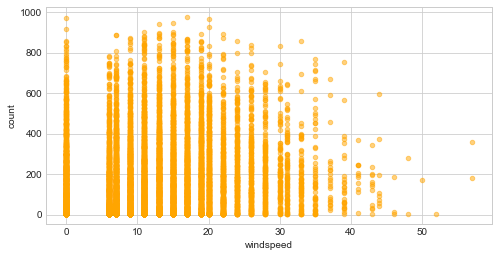

In [10]:
#Creating a scatter plot of count vs windspeed
bike.plot.scatter(x='windspeed',y='count',alpha=0.5,color='orange',figsize=(8,4))

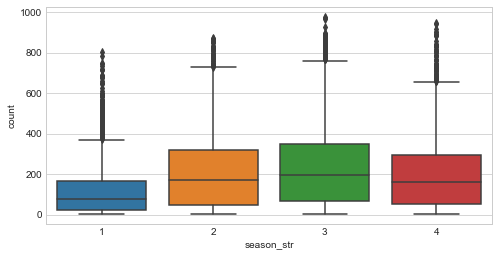

In [28]:
#Exploring the season data
bike['season_str'] = bike['season'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
sns.boxplot(x='season_str',y='count',data=bike)

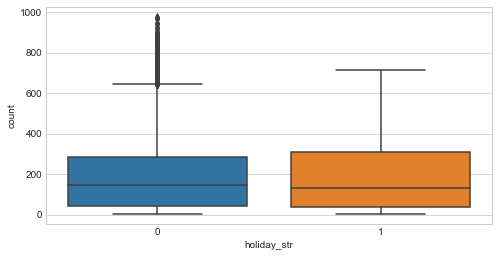

In [29]:
#Exploring the holiday data
bike['holiday_str'] = bike['holiday'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
sns.boxplot(x='holiday_str',y='count',data=bike)

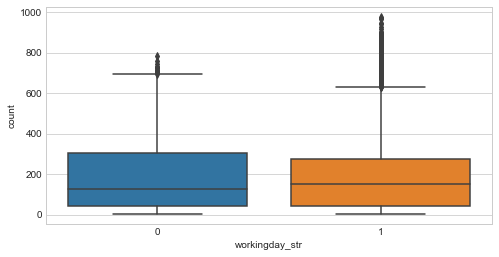

In [30]:
#Exploring the workingday data
bike['workingday_str'] = bike['workingday'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
sns.boxplot(x='workingday_str',y='count',data=bike)

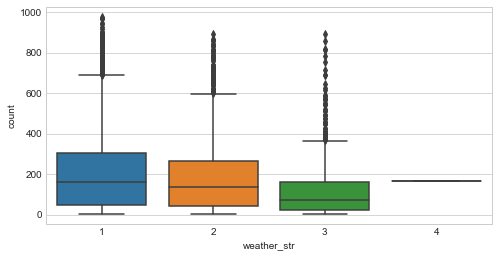

In [31]:
#Exploring the weather data
bike['weather_str'] = bike['weather'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
sns.boxplot(x='weather_str',y='count',data=bike)

# Feature Engineering

In [59]:
#Creating an "hour" column that takes the hour from the datetime column
bike['datetime_hour'] = bike['datetime'].apply(lambda x: int(x[11:13]))

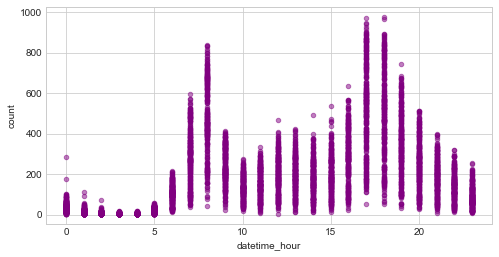

In [62]:
#Now creating a scatterplot of count versus hour
#Only use bike data where workingday==1
temp = bike[bike['workingday']==1]
temp.plot.scatter(x='datetime_hour',y='count',alpha=0.5,color='purple',figsize=(8,4))

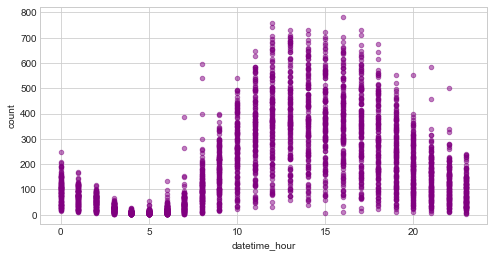

In [63]:
#Now creating a scatterplot of count versus hour
#Only use bike data where workingday==0
temp = bike[bike['workingday']==0]
temp.plot.scatter(x='datetime_hour',y='count',alpha=0.5,color='purple',figsize=(8,4))

# Building the Model

In [64]:
#A model that predicts count based solely on the temp feature
x_train = bike['temp'].copy()
y_train = bike['count'].copy()
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Fri, 27 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:22:58   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0462      4.439      1.362      0.1

In [80]:
#How many bike rentals would we predict if the temperature was 25 degrees Celsius?
print (6.0462 + 9.1705*25)

235.30870000000002


In [83]:
#Finally building a model that attempts to predict count based off of the following features. 
#season, holiday, workingday, weather, temp, humidity, windspeed, hour
x_train = bike[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'datetime_hour']].copy()
y_train = bike['count'].copy()
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     683.0
Date:                Fri, 27 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:37:00   Log-Likelihood:                -69830.
No. Observations:               10886   AIC:                         1.397e+05
Df Residuals:                   10877   BIC:                         1.397e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.9137      8.451      5.551

In [88]:
#Performance of the model
y_predicted = est.predict(x_train)
print('MAE:', sm.tools.eval_measures.meanabs(y_train, y_predicted, axis=0))
print('MSE:', sm.tools.eval_measures.mse(y_train, y_predicted, axis=0))
print ('RMSE:', sm.tools.eval_measures.rmse(y_train, y_predicted, axis=0))

MAE: 108.838821046
MSE: 21839.7046575
RMSE: 147.782626372
